In [1]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim

/home/andres/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Function to normalize image to [0, 1]
def normalize_image(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized_image = (image - min_val) / (max_val - min_val)
    return normalized_image

In [3]:
# Compute metrics
def show_metrics(ground_truth_path, prediction_path):
    # Open rasters
    with rasterio.open(ground_truth_path) as src:
        ground_truth = src.read(1)
    with rasterio.open(prediction_path) as src:
        prediction = src.read(1)
        
    img1_np = np.array(ground_truth)
    img2_np = np.array(prediction)

    img1_flat = img1_np.flatten()
    img2_flat = img2_np.flatten()

    # Compute MSE
    mse = mean_squared_error(img1_flat, img2_flat)
    print(f"Mean Squared Error between the images: {mse}")

    # Compute SSIM
    img1_normalized = normalize_image(img1_np)
    img2_normalized = normalize_image(img2_np)

    ssim_value, ssim_map = ssim(img1_normalized, img2_normalized, data_range=1.0, full=True)
    print(f"SSIM: {ssim_value}")

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))  # 1 row, 3 columnsz
    
    # Plot images
    axes[0].imshow(ground_truth, cmap='plasma')
    axes[0].set_title('CNN')
    axes[0].axis('off') # Hide axes
    
    axes[1].imshow(prediction, cmap='plasma')
    axes[1].set_title('Kriging Interpolation')
    axes[1].axis('off') # Hide axes

    # Display the SSIM map
    axes[2].imshow(ssim_map, cmap='gray')
    axes[2].set_title(f'SSIM Map (SSIM Value: {ssim_value:.4f})')
    axes[1].axis('off') # Hide axes
    #axes[2].colorbar()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

## Zaragoza

Mean Squared Error between the images: 0.00402414845302701
SSIM: 0.9149949017367988


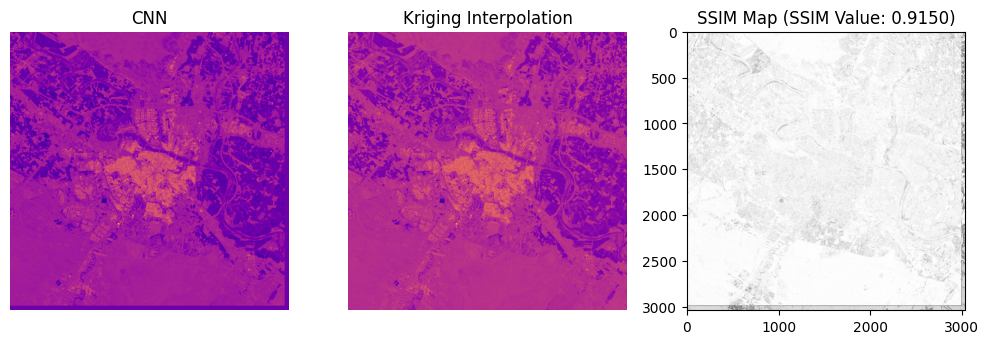

In [4]:
cnn_path = '../cnn/data/zaragoza_cnn_result.tif'
kriging_path = '../cnn/data/raw/zaragoza_interpolation_svf_gli.tif'
show_metrics(cnn_path, kriging_path)

## Oviedo

Mean Squared Error between the images: 1.1067644357681274
SSIM: -0.5664502165879436


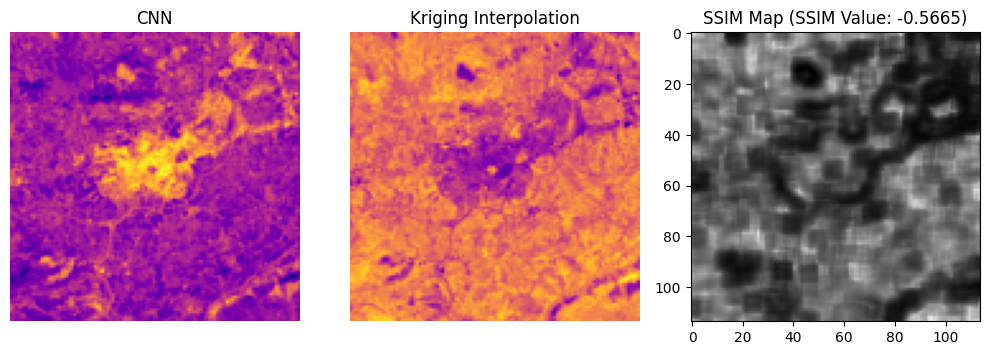

In [5]:
cnn_path = '../cnn/data/oviedo_cnn_result_scaled.tif'
kriging_path = '../cities/oviedo/results_100m/svf_gli.tif'
show_metrics(cnn_path, kriging_path)

## Sevilla

Mean Squared Error between the images: 0.010561560280621052
SSIM: 0.972902825606347


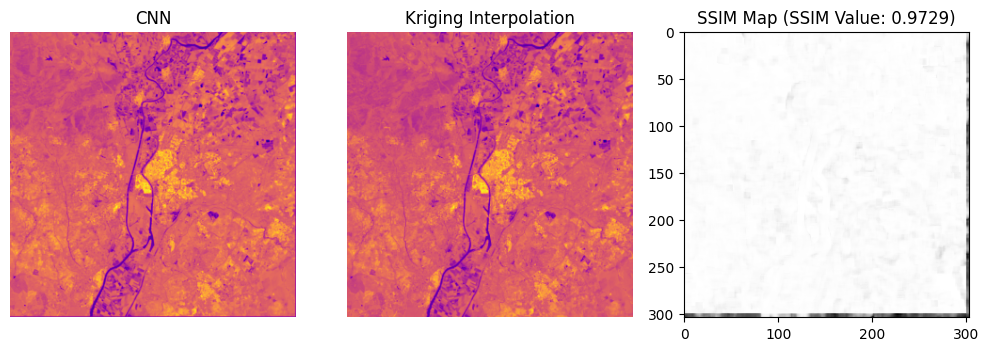

In [4]:
cnn_path = '../data/sevilla/cnn/cnn_result_scaled.tif'
kriging_path = '../data/sevilla/results/svf_gli.tif'
show_metrics(cnn_path, kriging_path)

## Valencia

Mean Squared Error between the images: 0.05888247489929199
SSIM: 0.7654453135738094


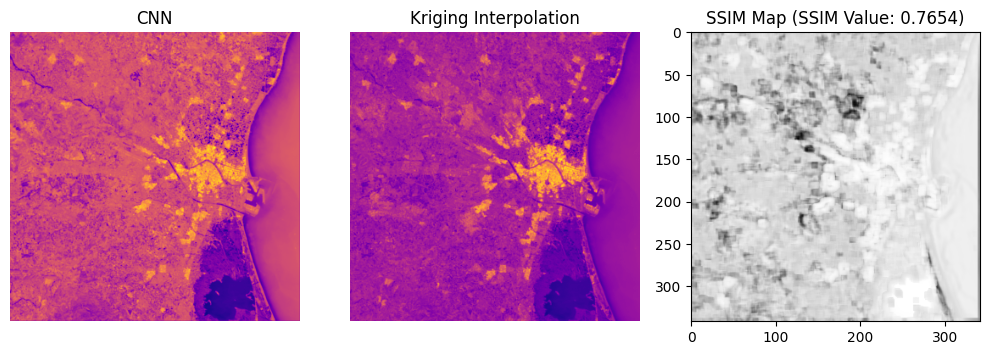

In [7]:
cnn_path = '../cnn/data/valencia_cnn_result_scaled.tif'
kriging_path = '../cities/valencia/results_5m/svf_gli.tif'
show_metrics(cnn_path, kriging_path)